In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
housedata = pd.read_csv("/Users/Shen/Documents/Flatiron/Phase 2 Project/dsc-phase-2-project-v2-5/data/kc_house_data.csv")

In [3]:
housedata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
housedata.shape

(30155, 25)

In [5]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [6]:
#drop nans
housedata.isna().sum().sort_values(ascending=False)

heat_source      32
sewer_system     14
long              0
nuisance          0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
condition         0
view              0
lat               0
grade             0
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
id                0
dtype: int64

In [7]:
#drop nans
housedata=housedata.dropna()

In [8]:
#convert date dtype to datetime
housedata['date'].head(

0     5/24/2022
1    12/13/2021
2     9/29/2021
3    12/14/2021
4     8/24/2021
Name: date, dtype: object

In [9]:
#convert date dtype to datetime
housedata['date']=pd.to_datetime(housedata['date'])
housedata['date'].dtype

dtype('<M8[ns]')

In [10]:
housedata['price'].describe().round(2)

count       30111.00
mean      1108970.65
std        896515.83
min         27360.00
25%        649236.00
50%        860000.00
75%       1300000.00
max      30750000.00
Name: price, dtype: float64

In [11]:
#identify price outliers
price=housedata.loc[housedata['price']>5000000.00]

In [12]:
#drop price outliers above 5m
housedata = housedata[housedata['price'] < 5000000.00]

In [13]:
#clean up datatype - 'bedrooms' to float
housedata['bedrooms'] = housedata['bedrooms'].astype(float)

In [14]:
housedata['bedrooms'].value_counts()

3.0     12705
4.0      9526
2.0      3913
5.0      2730
6.0       477
1.0       376
7.0        75
0.0        38
8.0        37
9.0        14
10.0        3
11.0        1
13.0        1
Name: bedrooms, dtype: int64

In [15]:
#drop bedrooms outliers - above 8 and 0.0
housedata = housedata[housedata['bedrooms'] < 8.0]


In [16]:
#identify sqftliving outliers
housedata['sqft_living'].describe()

count    29840.000000
mean      2090.666287
std        925.766474
min          3.000000
25%       1410.000000
50%       1910.000000
75%       2600.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [17]:
#identify sqftliving outliers > 5000  - 251 houses
sqft_living=housedata.loc[housedata['sqft_living']>5000.00]
sqft_living['sqft_living'].count()

251

In [18]:
#drop sqftliving outliers > 5000  - 251 houses
housedata = housedata[housedata['sqft_living'] < 5000.00]


In [19]:
#find unique values for each column 
housedata_uniques = housedata.apply(lambda x: x.unique())
housedata_uniques

id               [7399300360, 8910500230, 1180000275, 160460180...
date             [2022-05-24T00:00:00.000000000, 2021-12-13T00:...
price            [675000.0, 920000.0, 311000.0, 775000.0, 59250...
bedrooms                  [4.0, 5.0, 6.0, 3.0, 2.0, 1.0, 7.0, 0.0]
bathrooms        [1.0, 2.5, 2.0, 3.0, 1.5, 3.5, 4.0, 5.5, 5.0, ...
sqft_living      [1180, 2770, 2880, 2160, 1120, 1190, 2080, 221...
sqft_lot         [7140, 6703, 6156, 1400, 758, 5688, 27574, 350...
floors                         [1.0, 2.0, 1.5, 3.0, 2.5, 4.0, 3.5]
waterfront                                               [NO, YES]
greenbelt                                                [NO, YES]
nuisance                                                 [NO, YES]
view                        [NONE, AVERAGE, EXCELLENT, FAIR, GOOD]
condition                   [Good, Average, Very Good, Fair, Poor]
grade            [7 Average, 9 Better, 8 Good, 6 Low Average, 1...
heat_source      [Gas, Oil, Electricity, Gas/Solar, Electricit

In [20]:
housedata[['address','city','state and zip','country','addresother','addressother2']]=housedata['address'].str.split(',', expand=True)
housedata

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_built,yr_renovated,address,lat,long,city,state and zip,country,addresother,addressother2
0,7399300360,2022-05-24,675000.0,4.0,1.0,1180,7140,1.0,NO,NO,...,1969,0,2102 Southeast 21st Court,47.461975,-122.19052,Renton,Washington 98055,United States,None,None
1,8910500230,2021-12-13,920000.0,5.0,2.5,2770,6703,1.0,NO,NO,...,1950,0,11231 Greenwood Avenue North,47.711525,-122.35591,Seattle,Washington 98133,United States,None,None
2,1180000275,2021-09-29,311000.0,6.0,2.0,2880,6156,1.0,NO,NO,...,1956,0,8504 South 113th Street,47.502045,-122.22520,Seattle,Washington 98178,United States,None,None
3,1604601802,2021-12-14,775000.0,3.0,3.0,2160,1400,2.0,NO,NO,...,2010,0,4079 Letitia Avenue South,47.566110,-122.29020,Seattle,Washington 98118,United States,None,None
4,8562780790,2021-08-24,592500.0,2.0,2.0,1120,758,2.0,NO,NO,...,2012,0,2193 Northwest Talus Drive,47.532470,-122.07188,Issaquah,Washington 98027,United States,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.0,5.0,2.0,1910,4000,1.5,NO,NO,...,1921,0,4673 Eastern Avenue North,47.664740,-122.32940,Seattle,Washington 98103,United States,None,None
30151,194000695,2021-06-16,1313000.0,3.0,2.0,2020,5800,2.0,NO,NO,...,2011,0,4131 44th Avenue Southwest,47.565610,-122.38851,Seattle,Washington 98116,United States,None,None
30152,7960100080,2022-05-27,800000.0,3.0,2.0,1620,3600,1.0,NO,NO,...,1995,0,910 Martin Luther King Jr Way,47.610395,-122.29585,Seattle,Washington 98122,United States,None,None
30153,2781280080,2022-02-24,775000.0,3.0,2.5,2570,2889,2.0,NO,NO,...,2006,0,17127 114th Avenue Southeast,47.449490,-122.18908,Renton,Washington 98055,United States,None,None


In [21]:
import re

In [22]:
housedata['zip']=housedata['state and zip'].apply(lambda x: re.sub("[^0-9]", "", x))

In [23]:
housedata.zip

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zip, Length: 29585, dtype: object

In [24]:
housedata['zip']=housedata['zip'].astype(str)
housedata['zip']=housedata['zip'].str.strip()
housedata['kingscounty']=housedata['zip'].map(lambda x:x.startswith('98'))

In [25]:
housedata['kingscounty'].value_counts()

True     28685
False      900
Name: kingscounty, dtype: int64

In [26]:
housedata = housedata[housedata['kingscounty'] != False]

In [27]:
#end of cleaning addresses
housedata.kingscounty.value_counts()

True    28685
Name: kingscounty, dtype: int64

In [28]:
len(housedata.zip.unique())

88

In [29]:
housedata.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,kingscounty
id,1.000000,-0.024539,-0.000095,-0.000766,-0.014516,-0.117270,0.037784,-0.009018,-0.012116,0.000979,-0.038132,0.025867,-0.027873,0.001296,0.012002,NaN
price,-0.024539,1.000000,0.325609,0.482332,0.618722,0.074800,0.232343,0.540825,0.200994,0.259770,0.278057,0.109599,0.086264,0.379134,0.109082,NaN
bedrooms,-0.000095,0.325609,1.000000,0.579859,0.646703,-0.011917,0.183124,0.533688,0.214607,0.305181,0.168688,0.183282,0.004463,-0.027830,0.142617,NaN
bathrooms,-0.000766,0.482332,0.579859,1.000000,0.753833,0.013700,0.430677,0.640634,0.211350,0.440821,0.291951,0.468965,0.037110,0.031785,0.185946,NaN
sqft_living,-0.014516,0.618722,0.646703,0.753833,1.000000,0.091172,0.361616,0.864461,0.272582,0.485297,0.361587,0.343879,0.031246,0.029581,0.256106,NaN
sqft_lot,-0.117270,0.074800,-0.011917,0.013700,0.091172,1.000000,-0.028351,0.102921,-0.010055,0.066604,0.147707,0.004584,0.009094,-0.078929,0.178973,NaN
floors,0.037784,0.232343,0.183124,0.430677,0.361616,-0.028351,1.000000,0.518839,-0.270515,0.170694,0.113785,0.525767,-0.017488,0.042347,0.087432,NaN
sqft_above,-0.009018,0.540825,0.533688,0.640634,0.864461,0.102921,0.518839,1.000000,-0.166746,0.537837,0.271880,0.446283,0.001659,-0.048086,0.363703,NaN
sqft_basement,-0.012116,0.200994,0.214607,0.211350,0.272582,-0.010055,-0.270515,-0.166746,1.000000,-0.027224,0.180353,-0.251365,0.050144,0.189277,-0.234975,NaN
sqft_garage,0.000979,0.259770,0.305181,0.440821,0.485297,0.066604,0.170694,0.537837,-0.027224,1.000000,0.195021,0.497235,-0.107039,-0.143511,0.382138,NaN


In [30]:
housedatanew=housedata.drop(['yr_renovated','kingscounty','addresother','addressother2','state and zip'],axis=1)

In [31]:
housedatanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28685 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             28685 non-null  int64         
 1   date           28685 non-null  datetime64[ns]
 2   price          28685 non-null  float64       
 3   bedrooms       28685 non-null  float64       
 4   bathrooms      28685 non-null  float64       
 5   sqft_living    28685 non-null  int64         
 6   sqft_lot       28685 non-null  int64         
 7   floors         28685 non-null  float64       
 8   waterfront     28685 non-null  object        
 9   greenbelt      28685 non-null  object        
 10  nuisance       28685 non-null  object        
 11  view           28685 non-null  object        
 12  condition      28685 non-null  object        
 13  grade          28685 non-null  object        
 14  heat_source    28685 non-null  object        
 15  sewer_system   2868

In [32]:
housedata['waterfront'].value_counts()

NO     28270
YES      415
Name: waterfront, dtype: int64

In [33]:
housedatanew['waterfront']=housedatanew['waterfront'].apply(lambda x: 1 if x== "YES" else 0)

In [34]:
housedatanew['waterfront']=housedatanew['waterfront'].astype(int)

In [35]:
housedatanew['waterfront'].value_counts()

0    28270
1      415
Name: waterfront, dtype: int64

In [36]:
housedatanew['greenbelt']=housedatanew['greenbelt'].apply(lambda x: 1 if x=="YES" else 0)
housedatanew['nuisance']=housedatanew['nuisance'].apply(lambda x: 1 if x=="YES" else 0)

In [37]:
housedatanew['greenbelt']=housedatanew['greenbelt'].astype(int)
housedatanew['nuisance']=housedatanew['nuisance'].astype(int)

In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [39]:
housedatanew['view']=housedatanew['view'].astype('category')

In [40]:
housedatanew['view'].dtype

CategoricalDtype(categories=['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'], ordered=False)

In [41]:
housedatanew['view']=housedatanew['view'].cat.reorder_categories(['NONE', 'AVERAGE', 'FAIR', 'GOOD','EXCELLENT'])
housedatanew['view']

0           NONE
1        AVERAGE
2        AVERAGE
3        AVERAGE
4           NONE
          ...   
30150       NONE
30151       FAIR
30152       NONE
30153       NONE
30154       NONE
Name: view, Length: 28685, dtype: category
Categories (5, object): ['NONE', 'AVERAGE', 'FAIR', 'GOOD', 'EXCELLENT']

In [42]:
housedatanew['view']=housedatanew['view'].cat.codes
housedatanew['view']

0        0
1        1
2        1
3        1
4        0
        ..
30150    0
30151    2
30152    0
30153    0
30154    0
Name: view, Length: 28685, dtype: int8

In [43]:
housedatanew['view']=housedatanew['view'].astype(int)

In [44]:
housedatanew['condition']=housedatanew['condition'].astype('category')

In [45]:
housedatanew['condition']=housedatanew['condition'].cat.reorder_categories(['Poor','Fair','Good','Average','Very Good'])

In [46]:
housedatanew['condition']=housedatanew['condition'].cat.codes

In [47]:
housedatanew['condition']=housedatanew['condition'].astype(int)

In [48]:
housedatanew['grade'].value_counts()

7 Average        11527
8 Good            8818
9 Better          3536
6 Low Average     2840
10 Very Good      1230
5 Fair             384
11 Excellent       261
4 Low               46
12 Luxury           33
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [49]:
housedatanew['grade']=housedatanew['grade'].astype('category')

In [50]:
housedatanew['grade']=housedatanew['grade'].cat.reorder_categories(['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average','7 Average','8 Good','9 Better','10 Very Good','11 Excellent','12 Luxury'])

In [51]:
housedatanew['grade']=housedatanew['grade'].cat.codes

In [52]:
housedatanew['grade']=housedatanew['grade'].astype(int)

In [53]:
housedatanew['grade']=np.array(housedatanew['grade'])+2

In [54]:
housedatanew['heat_source'].unique()

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', 'Oil/Solar'], dtype=object)

In [55]:
housedatanew['heat_source']=housedatanew['heat_source'].astype(str)

In [56]:
housedatanew['persqft']=housedatanew['price']/housedatanew['sqft_living']

In [57]:
housedatanew['heat_source'].unique()

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', 'Oil/Solar'], dtype=object)

In [58]:
housedatanew['sewer_system'].unique()

array(['PUBLIC', 'PRIVATE', 'PRIVATE RESTRICTED', 'PUBLIC RESTRICTED'],
      dtype=object)

# --------------------END OF DATA CLEANING

In [238]:
housedatanew.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'address',
       'lat', 'long', 'city', 'country', 'zip', 'persqft', 'log_price',
       'Vacationgrade', 'EnvironmentRank'],
      dtype='object')

<AxesSubplot:xlabel='grade', ylabel='price'>

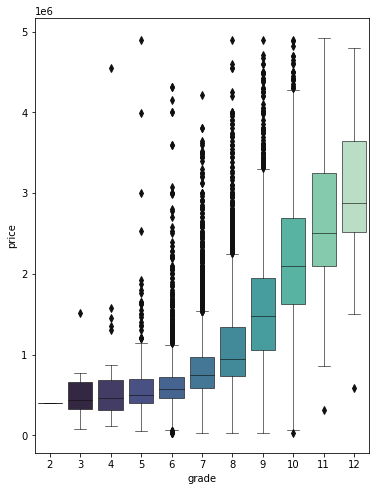

In [237]:
#boxplot grade vs price
fig, ax = plt.subplots(figsize = (6, 8))
sns.boxplot(data=housedatanew,x='grade',y='price',palette="mako",linewidth = 0.6)

<AxesSubplot:xlabel='condition', ylabel='price'>

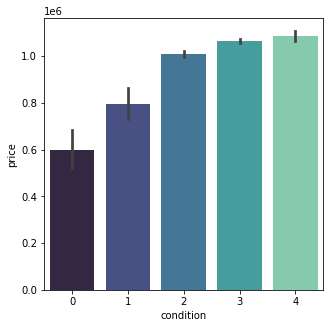

In [60]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.barplot(data=housedatanew,x='condition',y='price',palette="mako")

<function matplotlib.pyplot.show(close=None, block=None)>

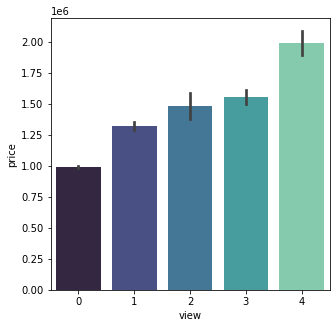

In [61]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.barplot(data=housedatanew,x='view',y='price',palette="mako")
plt.show

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

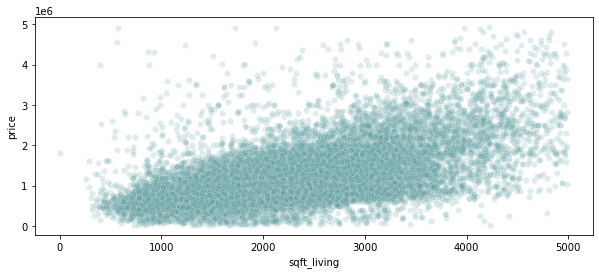

In [281]:
fig, ax = plt.subplots(figsize = (10,4))
sns.scatterplot(data=housedatanew,x='sqft_living',y='price',color='cadetblue',alpha=.2)

<AxesSubplot:xlabel='yr_built', ylabel='condition'>

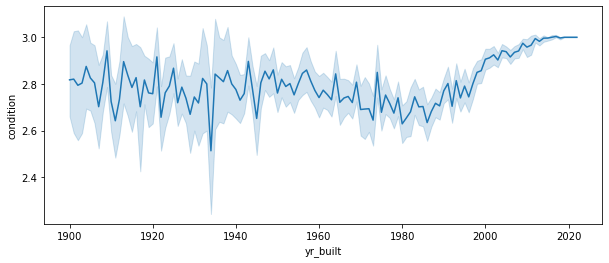

In [207]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.lineplot(data=housedatanew,x='yr_built',y='condition',palette='rocket')

<AxesSubplot:xlabel='waterfront', ylabel='sqft_living'>

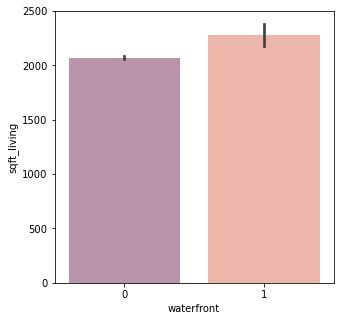

In [206]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.barplot(data=housedatanew,x='waterfront',y='sqft_living',palette='rocket',alpha=.5)

<function matplotlib.pyplot.show(close=None, block=None)>

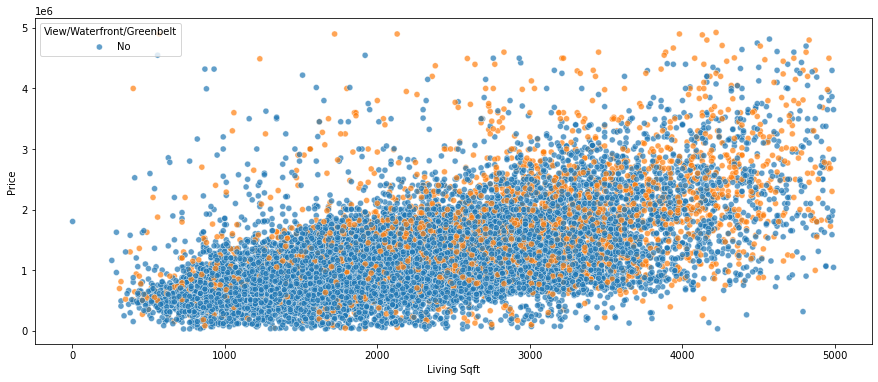

In [297]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(data=housedatanew,x='sqft_living',y='price',hue='EnvironmentRank',color='purple',legend=False,alpha=.7)
ax.set(xlabel='Living Sqft', ylabel='Price')
plt.legend(title='View/Waterfront/Greenbelt', loc='upper left', labels=['No', 'Yes'])
plt.show

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

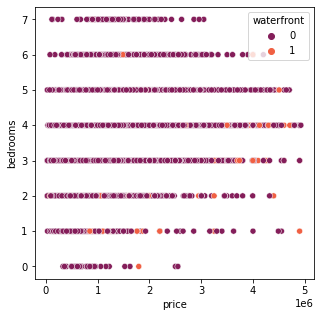

In [199]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.scatterplot(data=housedatanew,x='price',y='bedrooms',hue='waterfront',palette='rocket')

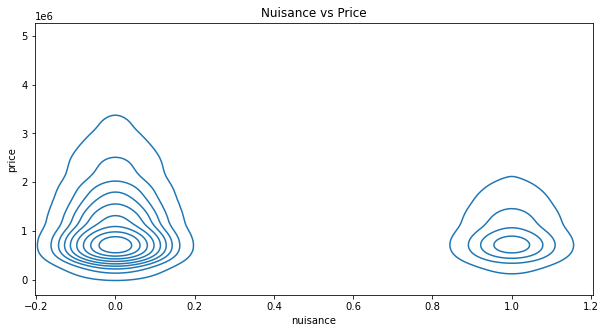

In [198]:
fig, ax = plt.subplots(figsize = (10, 5))
gf=sns.kdeplot(data=housedatanew,x='nuisance',y='price',palette='rocket')
plt.title("Nuisance vs Price")
plt.show()

Text(0.5, 1.0, 'Yr_Built vs Sqft_lot')

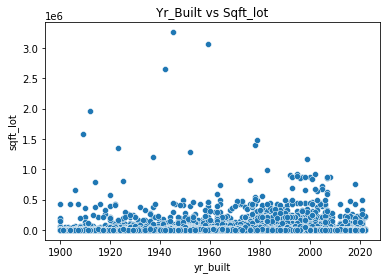

In [193]:
sns.scatterplot(x='yr_built',y='sqft_lot',data=housedatanew, palette ='rocket')
plt.title("Yr_Built vs Sqft_lot")

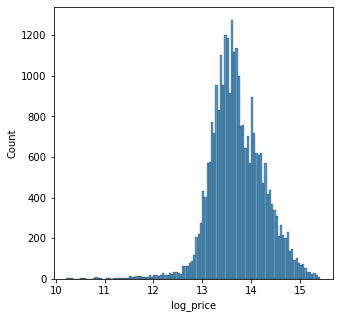

In [69]:
housedatanew['log_price']=np.log(housedatanew['price'])

fig, ax = plt.subplots(figsize = (5, 5))

ax = sns.histplot(data = housedatanew, x= housedatanew['log_price'])
plt.show();


In [70]:
np.exp(13.5)

729416.3698477013

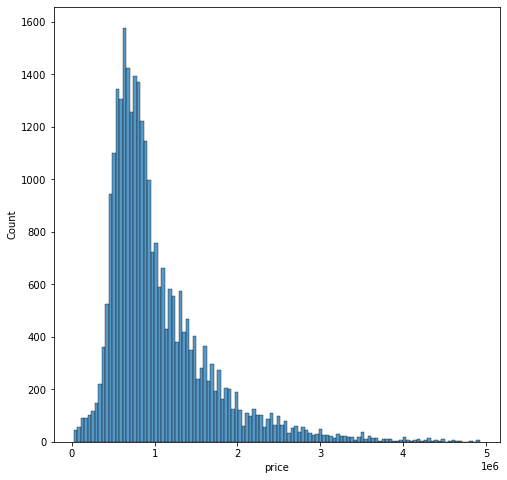

In [71]:
fig, ax = plt.subplots(figsize = (8, 8))

ax = sns.histplot(data = housedatanew, x= housedatanew['price'])
plt.show();


<function matplotlib.pyplot.show(close=None, block=None)>

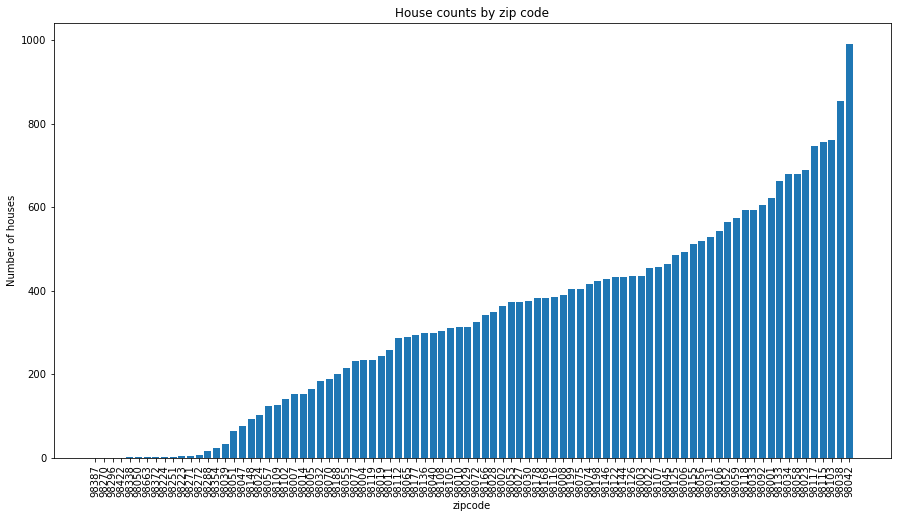

In [72]:

x=housedatanew['zip'].value_counts().sort_values().index
y=housedatanew['zip'].value_counts().sort_values().values
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x,y)
ax.set_title('House counts by zip code')
ax.set_xlabel('zipcode')
ax.set_ylabel('Number of houses')

plt.xticks(rotation=90)


plt.show

In [73]:
persqft_housetype=housedatanew.groupby('zip').agg({'price':'mean','sqft_living':'mean','bedrooms':'mean','bathrooms':'mean','waterfront':'mean','view':'mean','yr_built':'mean','grade':'mean','waterfront':'count','view':'count'}).round(2)
pricetable=persqft_housetype.sort_values(by = ('waterfront'),ascending = False)
pricetable=pricetable.reset_index()
pricetable['mostexpensivezip']=range(1,len(pricetable)+1)
pricetable

,zip,price,sqft_living,bedrooms,bathrooms,waterfront,view,yr_built,grade,mostexpensivezip
0,98042,668456.62,2129.77,3.54,2.33,991,991,1990.97,7.51,1
1,98038,804131.26,2218.01,3.48,2.46,855,855,1996.63,7.58,2
2,98103,1067443.52,1650.68,3.07,2.09,760,760,1956.75,7.42,3
3,98115,1161628.76,1862.63,3.19,2.04,755,755,1952.26,7.40,4
4,98117,1078119.51,1748.63,3.07,2.08,747,747,1955.39,7.37,5
...,...,...,...,...,...,...,...,...,...,...
83,98663,597450.00,960.00,2.00,2.50,2,2,2020.00,8.00,84
84,98270,2375000.00,3590.00,4.00,3.50,1,1,2006.00,9.00,85
85,98296,700000.00,2152.00,4.00,2.50,1,1,2009.00,8.00,86
86,98387,679950.00,1190.00,2.00,2.00,1,1,2022.00,7.00,87


In [74]:
#luxurydf=housedatanew.loc[housedatanew['zip']=='98006']
#this is fitting model by zip

In [75]:
#test modeling
lr = LinearRegression()
lr

LinearRegression()

In [76]:
view15= pricetable.nlargest(15, "view")

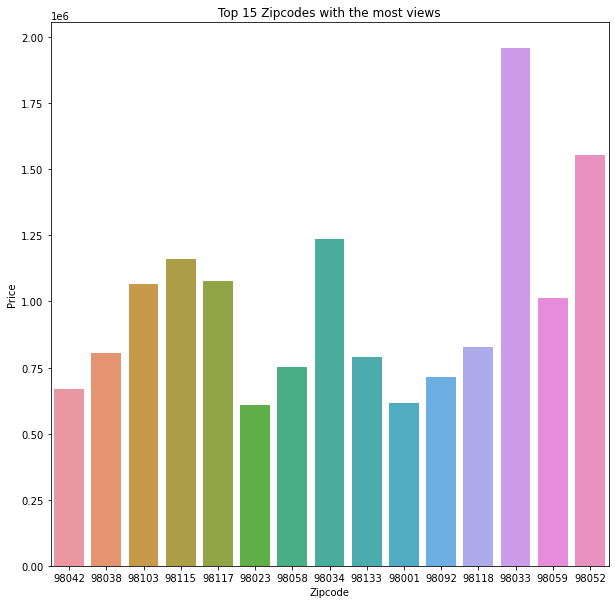

In [283]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(data = view15,
            x = view15['zip'],
            y = "price",
            ax = ax)
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.title("Top 15 Zipcodes with the most views")
plt.show();

In [78]:
heatmap_vac=housedatanew[['price','sqft_living','view','grade','waterfront','condition']]

In [213]:
feature_cols= ['view','waterfront','greenbelt','nuisance','grade']
X = housedatanew[feature_cols]
X_standard = X.apply(lambda x: (x - x.mean())/x.std())
y = housedatanew['price']
y_standard = (y - y.mean())/y.std()

In [214]:
import statsmodels.api as sm
X_aug = sm.add_constant(X_standard)
res = sm.OLS(y_standard, X_aug).fit()

In [215]:
res

In [216]:
weights=res.params
weights

const        -8.673617e-19
view          1.598635e-01
waterfront    3.921322e-02
greenbelt     3.264702e-02
nuisance      3.541622e-02
grade         5.754970e-01
dtype: float64

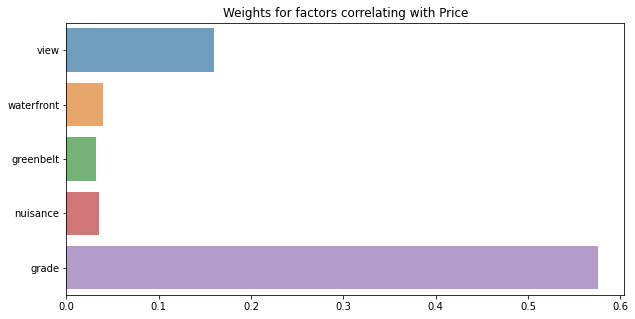

In [217]:
plt.figure(figsize=(10,5))
sns.barplot(y=weights[1::].index,x=weights[1::].values,alpha=0.7)
plt.title("Weights for factors correlating with Price")
plt.show()

In [218]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     3783.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:29:55   Log-Likelihood:                -33436.
No. Observations:               28685   AIC:                         6.688e+04
Df Residuals:                   28679   BIC:                         6.693e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.674e-19      0.005  -1.89e-16      1.000      -0.009       0.009
view           0.1599      0.005     31.292      0.000       0.150       0.170
waterfront     0.0392      0.005      7.786      0.000       0.029       0.049
greenbelt      0.0326      0.005      7.056      0.000       0.024       0.042
nuisance       0.0354      0.005      7.694      0.000       0.026       0.044
grade          0.5755      0.005    122.215      0.000       0.566       0.585
==============================================================================
Omnibus:                     9317.254   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46558.818
Skew:                           1.495   Prob(JB):                         0.00
Kurtosis:                       8.479   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

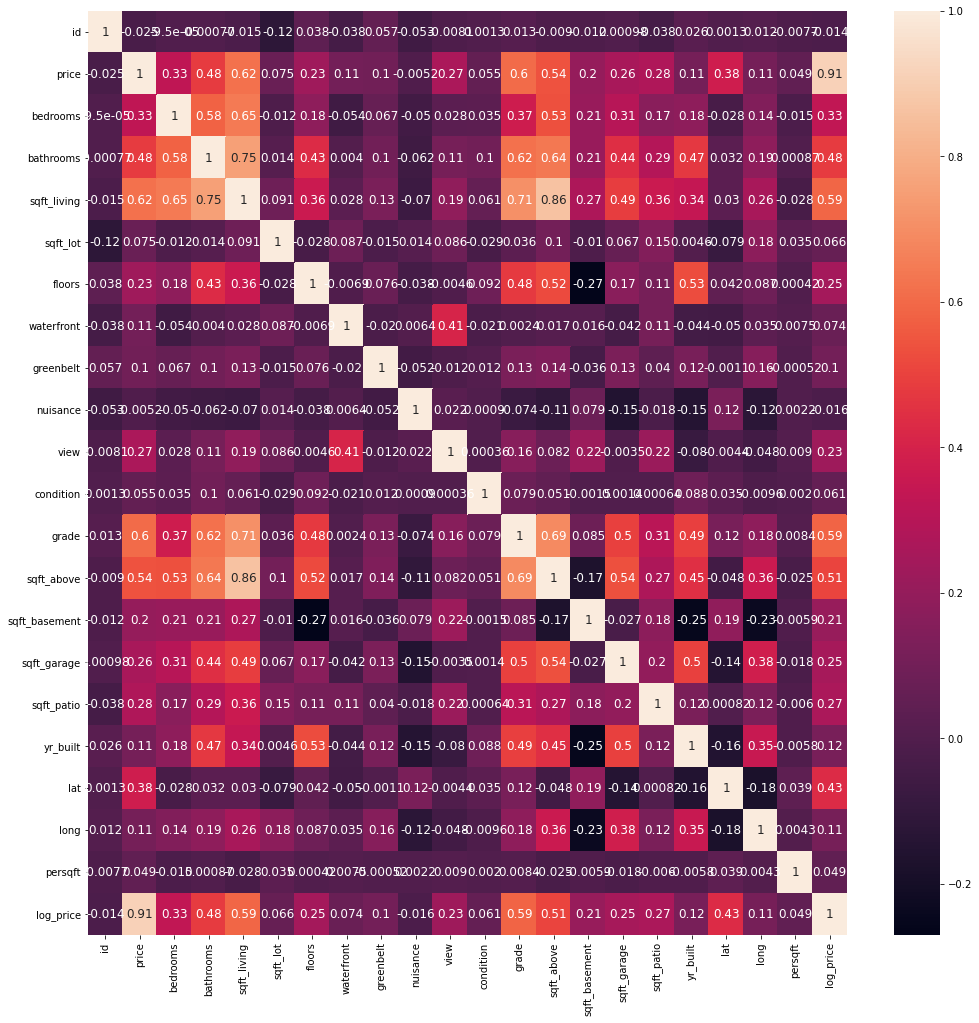

In [85]:
fig, ax = plt.subplots(figsize=(17,17)) 
sns.heatmap(housedatanew.corr(),annot=True,annot_kws={'size':12})


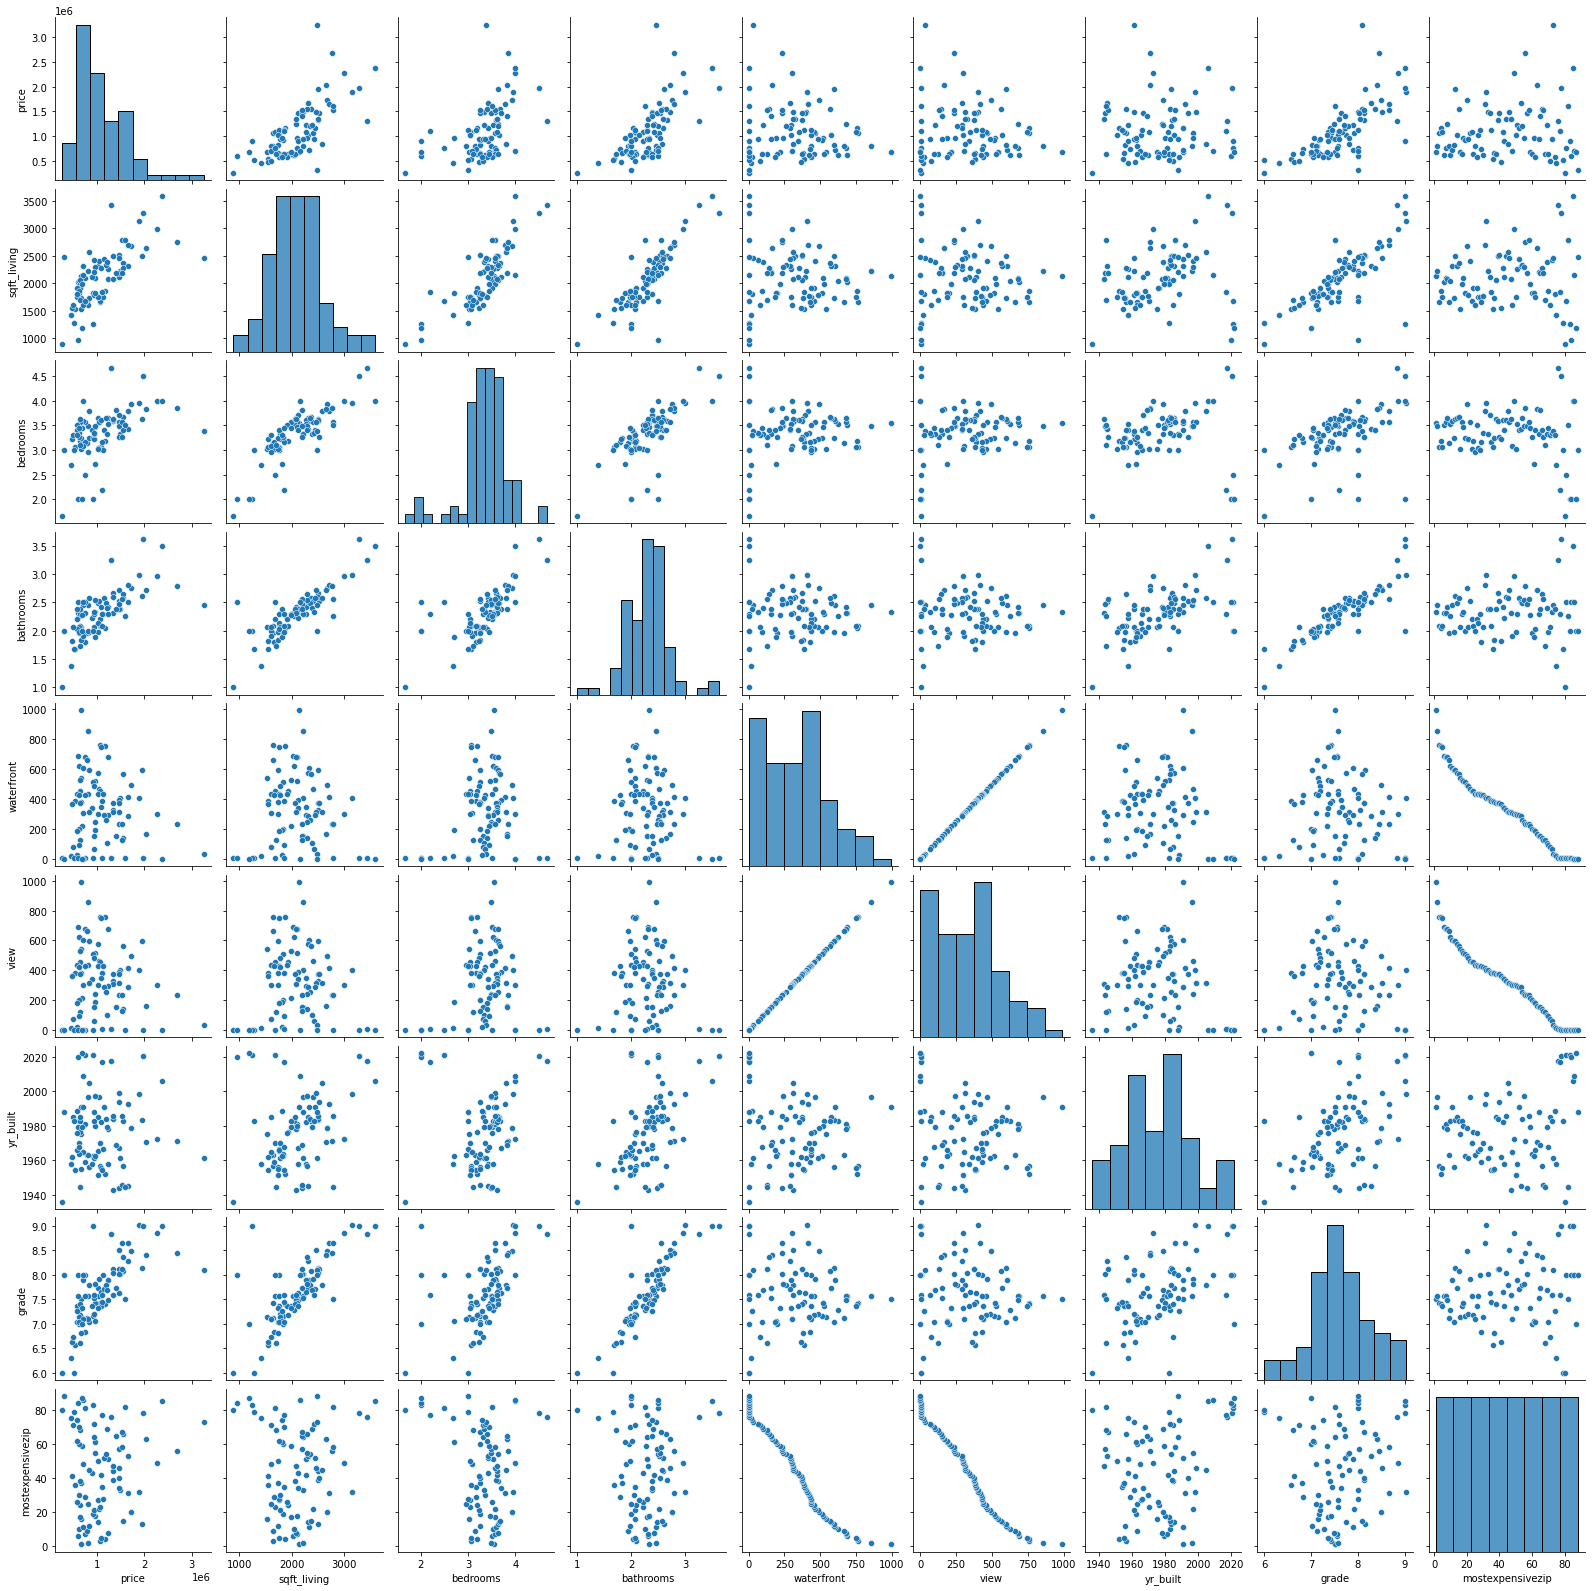

In [86]:
sns.pairplot(pricetable)
plt.show()

In [87]:
#test modeling
import statsmodels.api as sm
X_aug = sm.add_constant(X_standard)
res = sm.OLS(y_standard, X_aug).fit()

In [88]:
#test modeling
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     3505.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:55:27   Log-Likelihood:                -31835.
No. Observations:               28685   AIC:                         6.369e+04
Df Residuals:                   28677   BIC:                         6.375e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.674e-19      0.004     -2e-16      1.000      -0.008       0.008
bedrooms       -0.0553      0.006     -9.283      0.000      -0.067      -0.044
bathrooms      -0.0044      0.007     -0.634      0.526      -0.018       0.009
sqft_living     0.4083      0.008     48.556      0.000       0.392       0.425
view            0.1281      0.005     26.299      0.000       0.119       0.138
grade           0.3143      0.006     48.916      0.000       0.302       0.327
waterfront      0.0380      0.005      7.968      0.000       0.029       0.047
condition       0.0089      0.004      2.033      0.042       0.000       0.017
==============================================================================
Omnibus:                     9139.793   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53836.395
Skew:                           1.408   Prob(JB):                         0.00
Kurtosis:                       9.093   Cond. No.                         3.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# #test modeling - first try - all columns without heatsource and sewer system
col_selector = ['zip','bedrooms','sqft_living','sqft_lot','floors','waterfront','greenbelt','view','condition','grade','sqft_patio','yr_built', 'bathrooms']
# X = housedatanew[col_selector]
# y = housedatanew['price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [90]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(X_train)

# X_standardized_train = ss.transform(X_train)
# X_standardized_test = ss.transform(X_test)

# X_standardized_train.mean(axis = 0)
# X_standardized_train.std(axis = 0)

# X_standardized_test.mean(axis = 0)
# X_standardized_test.std(axis = 0)


# ohe = pd.get_dummies(X_train['zip'])
# ohe_train = pd.concat([X_train, ohe],1)
# ohe_train.drop('zip',1)


# lr.fit(ohe_train, y_train)
# lr.score(ohe_train,y_train)

# #list(zip(lr.coef_,ohe_train.columns))



In [91]:
# lr = LinearRegression()
# lr.fit(X_train,y_train)
# print(lr.score(X_train,y_train))
# print(lr.score(X_test,y_test))
# preds = lr.predict(X_test)
# sns.scatterplot(preds,y_test)

In [92]:
# list(zip(lr.coef_,X_train.columns))

In [93]:
#test modeling - try 2 - adding sewer system

#copied from previous input

col_selector = ['zip','bedrooms','sqft_living','sqft_lot','floors','waterfront','greenbelt','view','condition','grade','sqft_patio','yr_built', 'bathrooms','sewer_system','heat_source','view','waterfront','greenbelt']
X = housedatanew[col_selector]
y = housedatanew['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [94]:
# #dummies sewer_system 
# ohe1 = pd.get_dummies(X_train['sewer_system'], dummy_na=True)
# X_train = pd.concat([X_train, ohe1],1)
# X_train.drop(['sewer_system'],1, inplace = True)
# ohe2 = pd.get_dummies(X_test['sewer_system'], dummy_na=True)
# X_test = pd.concat([X_test, ohe2],1)
# X_test.drop(['sewer_system'],1, inplace = True)

In [95]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(X_train[['zip', 'heat_source', 'sewer_system']]).toarray()
ohe_test = ohe.transform(X_test[['zip', 'heat_source', 'sewer_system']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())


ohe_train.index = X_train.index
ohe_test.index = X_test.index 

X_train = pd.concat([X_train, ohe_train],1)
X_test = pd.concat([X_test, ohe_test],1)
X_train

X_train.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)
X_test.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)

In [96]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

X_standardized_train.mean(axis = 0)
X_standardized_train.std(axis = 0)

X_standardized_test.mean(axis = 0)
X_standardized_test.std(axis = 0)

lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.724848655454509

In [97]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(handle_unknown = 'ignore')

# ohe_train = ohe.fit_transform(X_train[['zip', 'heat_source', 'sewer_system']]).toarray()
# ohe_test = ohe.transform(X_test[['zip', 'heat_source', 'sewer_system']]).toarray()

# ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
# ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())


# ohe_train.index = X_train.index
# ohe_test.index = X_test.index 

# X_train = pd.concat([X_train, ohe_train],1)
# X_test = pd.concat([X_test, ohe_test],1)
# X_train

# X_train.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)
# X_test.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)

In [98]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train,y_train)
lr.score(X_test,y_test)

0.724848655454509

0.717008361609385
0.724848655454509


<AxesSubplot:ylabel='price'>

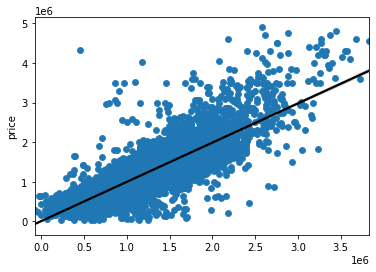

In [99]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
preds = lr.predict(X_test)
sns.scatterplot(preds,y_test)
sns.regplot(preds,y_test,line_kws={'color':'black'})

In [100]:
#model testing - change dataset: condition(2-4), view(2-4), 


In [101]:
# #dummies heat_source 
# ohe2 = pd.get_dummies(X_train['heat_source'], dummy_na=True)
# X_train = pd.concat([X_train, ohe2],1)
# X_train.drop(['heat_source'],1, inplace = True)
# ohe = pd.get_dummies(X_test['heat_source'], dummy_na=True)
# X_test = pd.concat([X_test, ohe2],1)
# X_test.drop(['heat_source'],1, inplace = True)

In [102]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(X_train)

# X_standardized_train = ss.transform(X_train)
# X_standardized_test = ss.transform(X_test)

# X_standardized_train.mean(axis = 0)
# X_standardized_train.std(axis = 0)

# X_standardized_test.mean(axis = 0)
# X_standardized_test.std(axis = 0)

# lr.fit(X_train, y_train)
# lr.score(X_test,y_test)

## End of running first modeling 

## Begin of first model testing for "Vacation Home"

##Creating engineering feature of view/waterfront + no nuisance

In [103]:
#Import original dataframe, rename to vacation_housedata
vacation_housedata=housedatanew

In [104]:
vacation_housedata['Vacationgrade']=vacation_housedata['view']+vacation_housedata['waterfront']+vacation_housedata['greenbelt']

In [105]:
vacation_housedata['EnvironmentRank']= vacation_housedata['Vacationgrade'].apply(lambda x : 1 if x != 0 else 0)

In [106]:
vacation_housedata['EnvironmentRank'].value_counts()

0    24680
1     4005
Name: EnvironmentRank, dtype: int64

In [107]:
vacation_housedata=vacation_housedata[vacation_housedata['EnvironmentRank']!=0]

###### Vaction-Modeling Test 1 - 

####### including 'zip','bedrooms','sqft_living','sqft_lot','floors','waterfront','greenbelt','view','condition','grade','sqft_patio','yr_built', 
'bathrooms','sewer_system','heat_source','view','waterfront','greenbelt'

In [108]:
cols =['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system','sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 
       'lat', 'long', 'city', 'zip', 'persqft', 
       'Vacationgrade', 'EnvironmentRank']

In [109]:
col_selector = ['zip','bedrooms','sqft_living','sqft_lot','floors','waterfront','greenbelt','view','condition','grade','sqft_patio','yr_built', 'bathrooms','sewer_system','heat_source','waterfront','greenbelt']
vacX = vacation_housedata[cols]
vacy = np.log(vacation_housedata['price'])

vacX_train, vacX_test, vacy_train, vacy_test = train_test_split(vacX, vacy, test_size=0.33)

In [110]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX_train[['zip', 'heat_source', 'sewer_system', 'city']]).toarray()
ohe_test = ohe.transform(vacX_test[['zip', 'heat_source', 'sewer_system','city']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX_train.index
ohe_test.index = vacX_test.index 

vacX_train = pd.concat([vacX_train, ohe_train],1)
vacX_test = pd.concat([vacX_test, ohe_test],1)
vacX_train

vacX_train.drop(columns =['zip', 'heat_source', 'sewer_system', 'city'], inplace = True)
vacX_test.drop(columns =['zip', 'heat_source', 'sewer_system','city'], inplace = True)

In [111]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX_train)
vacX_standardized_train = ss.transform(vacX_train)
vacX_standardized_test = ss.transform(vacX_test)

vacX_standardized_train.mean(axis = 0)
vacX_standardized_train.std(axis = 0)

vacX_standardized_test.mean(axis = 0)
vacX_standardized_test.std(axis = 0)

lr.fit(vacX_train, vacy_train)

print(lr.score(vacX_test,vacy_test))

0.7798918472217663


In [112]:
lr = LinearRegression()
lr.fit(vacX_train, vacy_train)
print(lr.score(vacX_train,vacy_train))
print(lr.score(vacX_test,vacy_test))

0.7967891074888213
0.7798918472217663


0.7967891074888213
0.7798918472217663


<AxesSubplot:ylabel='price'>

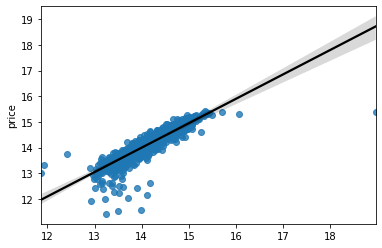

In [113]:
lr = LinearRegression()
lr.fit(vacX_train,vacy_train)
print(lr.score(vacX_train,vacy_train))
print(lr.score(vacX_test,vacy_test))
preds = lr.predict(vacX_test)
sns.regplot(preds,vacy_test,line_kws={'color':'black'})

###### Vaction-Modeling Test 2 - change sqft_living to sqft_above 

In [114]:
col_selector = ['bedrooms', 'bathrooms',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system','sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 
       'lat', 'long', 'city', 'zip', 'persqft', 
       'Vacationgrade', 'EnvironmentRank']
vacX2 = vacation_housedata[col_selector]
vacy2 = vacation_housedata['price']

vacX2_train, vacX2_test, vacy2_train, vacy2_test = train_test_split(vacX2, vacy2, test_size=0.2)

In [115]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX2_train[['zip', 'heat_source', 'sewer_system','city']]).toarray()
ohe_test = ohe.transform(vacX2_test[['zip', 'heat_source', 'sewer_system','city']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX2_train.index
ohe_test.index = vacX2_test.index 

vacX2_train = pd.concat([vacX2_train, ohe_train],1)
vacX2_test = pd.concat([vacX2_test, ohe_test],1)
vacX2_train

vacX2_train.drop(columns =['zip', 'heat_source', 'sewer_system','city'], inplace = True)
vacX2_test.drop(columns =['zip', 'heat_source', 'sewer_system','city'], inplace = True)

In [116]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX2_train)
vacX2_standardized_train = ss.transform(vacX2_train)
vacX2_standardized_test = ss.transform(vacX2_test)

vacX2_standardized_train.mean(axis = 0)
vacX2_standardized_train.std(axis = 0)

vacX2_standardized_test.mean(axis = 0)
vacX2_standardized_test.std(axis = 0)

lr.fit(vacX2_train, vacy2_train)
lr.score(vacX2_test,vacy2_test)

0.8479994515432668

In [117]:
lr = LinearRegression()
lr.fit(vacX2_train, vacy2_train)
lr.score(vacX2_train,vacy2_train)
lr.score(vacX2_test,vacy2_test)

0.8479994515432668

0.827789575082407
0.8479994515432668


<AxesSubplot:ylabel='price'>

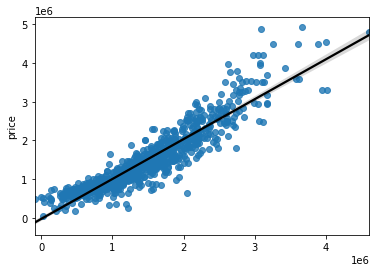

In [118]:
lr = LinearRegression()
lr.fit(vacX2_train,vacy2_train)
print(lr.score(vacX2_train,vacy2_train))
print(lr.score(vacX2_test,vacy2_test))
preds = lr.predict(vacX2_test)
sns.regplot(preds,vacy2_test,line_kws={'color':'black'})

##Vaction-Modeling Test 3 - remove yr_built and condition

In [119]:
col_selector = ['zip','bedrooms','sqft_above','sqft_lot','floors','waterfront','greenbelt','view','grade','sqft_patio', 'bathrooms','sewer_system','heat_source','waterfront','greenbelt']
vacX3 = vacation_housedata[col_selector]
vacy = vacation_housedata['price']

vacX3_train, vacX3_test, vacy_train, vacy_test = train_test_split(vacX3, vacy, test_size=0.2)

In [120]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX3_train[['zip', 'heat_source', 'sewer_system']]).toarray()
ohe_test = ohe.transform(vacX3_test[['zip', 'heat_source', 'sewer_system']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX3_train.index
ohe_test.index = vacX3_test.index 

vacX3_train = pd.concat([vacX3_train, ohe_train],1)
vacX3_test = pd.concat([vacX3_test, ohe_test],1)
vacX3_train

vacX3_train.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)
vacX3_test.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)

In [121]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX3_train)
vacX3_standardized_train = ss.transform(vacX3_train)
vacX3_standardized_test = ss.transform(vacX3_test)

vacX3_standardized_train.mean(axis = 0)
vacX3_standardized_train.std(axis = 0)

vacX3_standardized_test.mean(axis = 0)
vacX3_standardized_test.std(axis = 0)

lr.fit(vacX3_train, vacy_train)
print(lr.score(vacX3_test,vacy_test))

0.6642877040664068


In [122]:
lr = LinearRegression()
lr.fit(vacX3_train, vacy_train)
lr.score(vacX3_train,vacy_train)
lr.score(vacX3_test,vacy_test)

0.6642877040664068

0.6831410810541869
0.6642877040664068


<AxesSubplot:ylabel='price'>

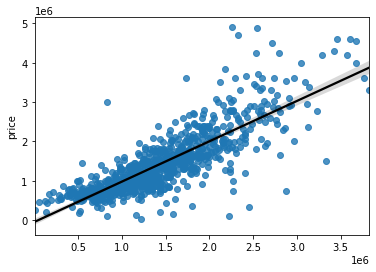

In [123]:
lr = LinearRegression()
lr.fit(vacX3_train,vacy_train)
print(lr.score(vacX3_train,vacy_train))
print(lr.score(vacX3_test,vacy_test))
preds = lr.predict(vacX3_test)
sns.regplot(preds,vacy_test,line_kws={'color':'black'})

##Vaction-Modeling Test 4 - remove floors, bedrooms + 'EnvironmentRank

In [124]:
col_selector = ['zip','sqft_above','sqft_lot','bathrooms','sqft_living','waterfront','greenbelt','view','grade','sqft_patio','sewer_system','heat_source','waterfront','greenbelt','EnvironmentRank']
vacX4 = vacation_housedata[col_selector]
vacy = vacation_housedata['price']

vacX4_train, vacX4_test, vacy_train, vacy_test = train_test_split(vacX4, vacy, test_size=0.2)

In [125]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX4_train[['zip', 'heat_source', 'sewer_system']]).toarray()
ohe_test = ohe.transform(vacX4_test[['zip', 'heat_source', 'sewer_system']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX4_train.index
ohe_test.index = vacX4_test.index 

vacX4_train = pd.concat([vacX4_train, ohe_train],1)
vacX4_test = pd.concat([vacX4_test, ohe_test],1)


vacX4_train.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)
vacX4_test.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)

In [126]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX4_train)
vacX4_standardized_train = ss.transform(vacX4_train)
vacX4_standardized_test = ss.transform(vacX4_test)

vacX4_standardized_train.mean(axis = 0)
vacX4_standardized_train.std(axis = 0)

vacX4_standardized_test.mean(axis = 0)
vacX4_standardized_test.std(axis = 0)

lr.fit(vacX4_train, vacy_train)
lr.score(vacX4_test,vacy_test)

0.6445058547587963

0.6943906693669302
0.6445058547587963


<AxesSubplot:ylabel='price'>

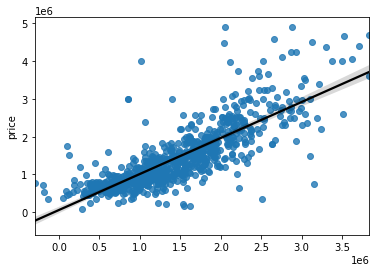

In [127]:
lr = LinearRegression()
lr.fit(vacX4_train,vacy_train)
print(lr.score(vacX4_train,vacy_train))
print(lr.score(vacX4_test,vacy_test))
preds = lr.predict(vacX4_test)
sns.regplot(preds,vacy_test,line_kws={'color':'black'})

<AxesSubplot:>

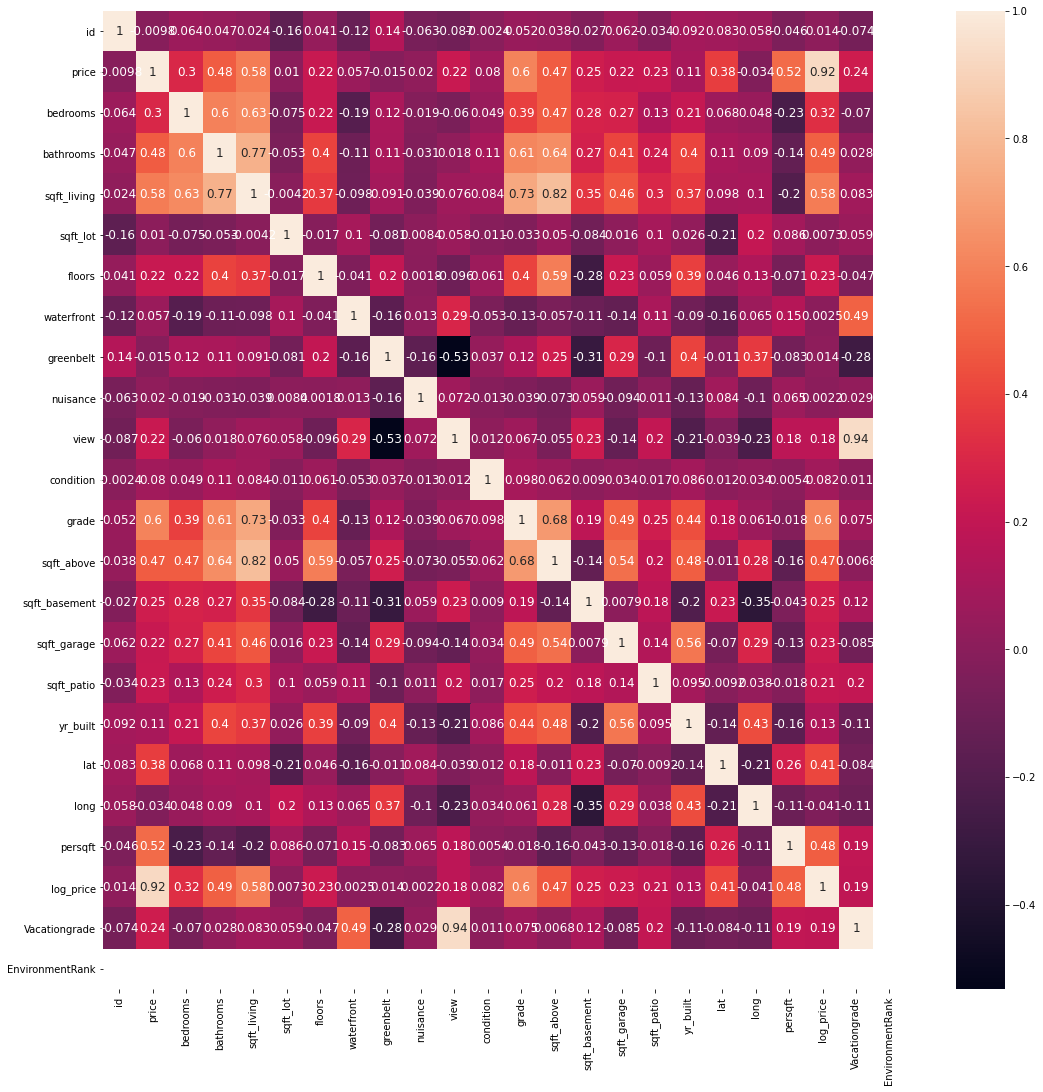

In [128]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(vacation_housedata.corr(),annot=True,annot_kws={'size':12})

##Vaction-Modeling Test 5 - 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'

In [129]:
col_selector = ['zip','sqft_above','bathrooms','sqft_garage','condition','sqft_lot','waterfront','greenbelt','view','grade','sqft_patio','sewer_system','heat_source','waterfront','greenbelt','EnvironmentRank']
vacX5 = vacation_housedata[col_selector]
vacy = vacation_housedata['price']

vacX5_train, vacX5_test, vacy_train, vacy_test = train_test_split(vacX5, vacy, test_size=0.2)

In [130]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX5_train[['zip', 'heat_source', 'sewer_system']]).toarray()
ohe_test = ohe.transform(vacX5_test[['zip', 'heat_source', 'sewer_system']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX5_train.index
ohe_test.index = vacX5_test.index 

vacX5_train = pd.concat([vacX5_train, ohe_train],1)
vacX5_test = pd.concat([vacX5_test, ohe_test],1)


vacX5_train.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)
vacX5_test.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)

In [131]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX5_train)
vacX5_standardized_train = ss.transform(vacX5_train)
vacX5_standardized_test = ss.transform(vacX5_test)

vacX5_standardized_train.mean(axis = 0)
vacX5_standardized_train.std(axis = 0)

vacX5_standardized_test.mean(axis = 0)
vacX5_standardized_test.std(axis = 0)

lr.fit(vacX5_train, vacy_train)
lr.score(vacX5_test,vacy_test)

0.645543856937295

0.6826245412500472
0.645543856937295


<AxesSubplot:ylabel='price'>

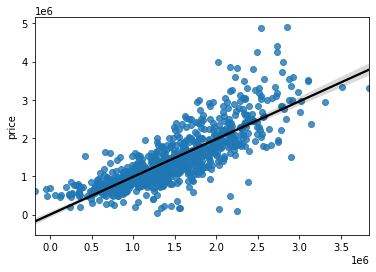

In [132]:
lr = LinearRegression()
lr.fit(vacX5_train,vacy_train)
print(lr.score(vacX5_train,vacy_train))
print(lr.score(vacX5_test,vacy_test))
preds = lr.predict(vacX5_test)
sns.color_palette("rocket", as_cmap=True)
sns.regplot(preds,vacy_test,line_kws={'color':'black'})

##Vaction-Modeling Test 6 - change subset data

In [133]:
vacation_housedata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'address',
       'lat', 'long', 'city', 'country', 'zip', 'persqft', 'log_price',
       'Vacationgrade', 'EnvironmentRank'],
      dtype='object')

In [134]:
vacation_housedata['price'].median()

1275000.0

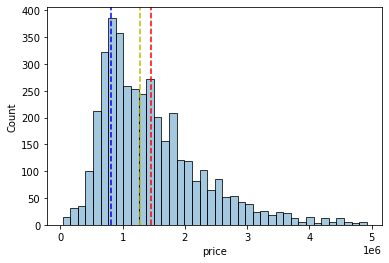

In [135]:
sequential_colors = sns.color_palette("RdPu", 10)

sns.histplot(data=vacation_housedata,x=vacation_housedata['price'],alpha=0.4)

plt.axvline(vacation_housedata['price'].mean(), color='r', linestyle='--', label="Mean")
plt.axvline(vacation_housedata['price'].std(), color='b', linestyle='--', label="Std")
plt.axvline(vacation_housedata['price'].median(), color='y', linestyle='--', label="median")


In [136]:
#reduce subset to 3992
vacation_housedata=vacation_housedata[vacation_housedata['grade']> 4]

In [137]:
#3969
vacation_housedata=vacation_housedata[vacation_housedata['price']>200000.00]
len(vacation_housedata)

3969

In [138]:
#remove condition below 2

vacation_housedata=vacation_housedata[vacation_housedata['condition']>1]

In [139]:
#combine heat_source
vacation_housedata.heat_source=vacation_housedata.heat_source.replace('Oil','Oil/Solar')
vacation_housedata.heat_source=vacation_housedata.heat_source.replace('Gas','Gas/Solar')
vacation_housedata.heat_source=vacation_housedata.heat_source.replace('Electricity','Electricity/Solar')
vacation_housedata.heat_source=vacation_housedata.heat_source.replace('Other','Electricity/Solar')

In [140]:
#combine sewer_system
vacation_housedata.sewer_system=vacation_housedata.sewer_system.replace('PRIVATE RESTRICTED','PRIVATE')
vacation_housedata.sewer_system=vacation_housedata.sewer_system.replace('PUBLIC RESTRICTED','PUBLIC')

In [141]:
col_selector = ['bedrooms', 'bathrooms',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system','sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 
       'lat', 'long', 'city', 'zip', 'persqft', 
       'Vacationgrade', 'EnvironmentRank']
vacX6 = vacation_housedata[col_selector]
vacy = vacation_housedata['price']

vacX6_train, vacX6_test, vacy_train, vacy_test = train_test_split(vacX6, vacy, test_size=0.2)

In [142]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX6_train[['city','zip', 'heat_source', 'sewer_system']]).toarray()
ohe_test = ohe.transform(vacX6_test[['city','zip', 'heat_source', 'sewer_system']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX6_train.index
ohe_test.index = vacX6_test.index 

vacX6_train = pd.concat([vacX6_train, ohe_train],1)
vacX6_test = pd.concat([vacX6_test, ohe_test],1)


vacX6_train.drop(columns =['city','zip', 'heat_source', 'sewer_system'], inplace = True)
vacX6_test.drop(columns =['city','zip', 'heat_source', 'sewer_system'], inplace = True)

In [143]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX6_train)
vacX6_standardized_train = ss.transform(vacX6_train)
vacX6_standardized_test = ss.transform(vacX6_test)

vacX6_standardized_train.mean(axis = 0)
vacX6_standardized_train.std(axis = 0)

vacX6_standardized_test.mean(axis = 0)
vacX6_standardized_test.std(axis = 0)

lr.fit(vacX6_train, vacy_train)
lr.score(vacX6_test,vacy_test)

0.8307969060059193

0.8336145878231258
0.8307969060059193


<Figure size 1800x360 with 0 Axes>

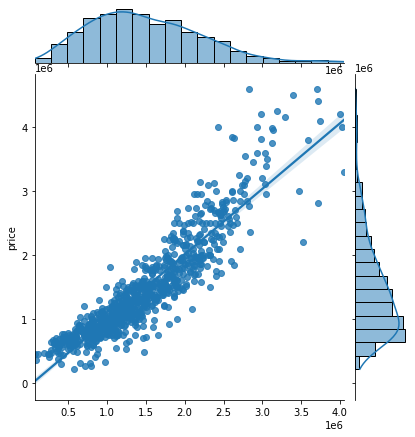

In [180]:
lr = LinearRegression()
lr.fit(vacX6_train,vacy_train)
print(lr.score(vacX6_train,vacy_train))
print(lr.score(vacX6_test,vacy_test))
preds = lr.predict(vacX6_test)
plt.figure(figsize=(25,5))
sns.jointplot(preds,vacy_test, kind='reg',palette=("RdPu", 10));
#sns.regplot(preds,vacy_test,line_kws={'color':'black'})

## Model Testing 2 result - visualization

In [254]:
modellist=list(zip(lr.coef_,vacX2_train.columns))
#lr.fit(vacX2_train, vacy2_train)
#lr.score(vacX2_train,vacy2_train)
#lr.score(vacX2_test,vacy2_test)
modellist

[(50493.66192247774, 'bedrooms'),
 (80585.40133527179, 'bathrooms'),
 (0.16595828532854284, 'sqft_lot'),
 (-87159.65588330863, 'floors'),
 (180480.64157624598, 'waterfront'),
 (-52323.60683736841, 'greenbelt'),
 (-35410.51551175209, 'nuisance'),
 (-34866.250276112325, 'view'),
 (12928.938174155563, 'condition'),
 (136123.99381934502, 'grade'),
 (353.8825004054088, 'sqft_above'),
 (200.94046850252198, 'sqft_basement'),
 (-116.31966098921839, 'sqft_garage'),
 (86.4556578588672, 'sqft_patio'),
 (-729.5120132002885, 'yr_built'),
 (-533721.1428887132, 'lat'),
 (-715220.5704974512, 'long'),
 (963.4532545188413, 'persqft'),
 (93290.78396630597, 'Vacationgrade'),
 (1.816079020500183e-08, 'EnvironmentRank'),
 (-451230.95592720225, 'x0_98001'),
 (241677.83908994036, 'x0_98002'),
 (-70733.05283870146, 'x0_98003'),
 (84365.1768424983, 'x0_98004'),
 (-123271.23584615602, 'x0_98005'),
 (335871.4316552152, 'x0_98006'),
 (611224.2342089466, 'x0_98007'),
 (-198808.27210928057, 'x0_98008'),
 (-420509.87

In [146]:
coeflist=pd.DataFrame(modellist,columns=['Coef',"Feature"])
Coef_feature=coeflist.iloc[:9]

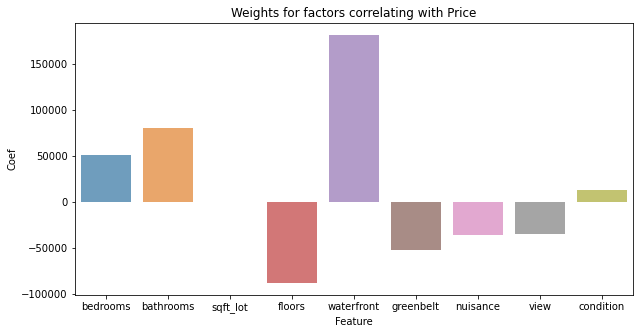

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(data=Coef_feature,y='Coef',x='Feature',alpha=0.7)
plt.title("Weights for factors correlating with Price")
plt.show()

In [148]:
coeflist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Coef     140 non-null    float64
 1   Feature  140 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [149]:
coeflist=pd.DataFrame(modellist,columns=['Coef',"Feature"])


In [150]:
coezip=coeflist.iloc[20:96]
coezip


,Coef,Feature
20,-451230.955927,x0_98001
21,241677.839090,x0_98002
22,-70733.052839,x0_98003
23,84365.176842,x0_98004
24,-123271.235846,x0_98005
...,...,...
91,375933.424657,x0_98199
92,-221940.369089,x0_98224
93,15027.757325,x0_98270
94,-163038.590516,x0_98271


In [151]:
coezip.Feature=coezip.Feature.apply(lambda x: x.replace("x0_",""))
    

In [152]:
coezip

,Coef,Feature
20,-451230.955927,98001
21,241677.839090,98002
22,-70733.052839,98003
23,84365.176842,98004
24,-123271.235846,98005
...,...,...
91,375933.424657,98199
92,-221940.369089,98224
93,15027.757325,98270
94,-163038.590516,98271


In [153]:
coezip=coezip.rename(columns = {'Feature':'zip'})

In [154]:
coezip

,Coef,zip
20,-451230.955927,98001
21,241677.839090,98002
22,-70733.052839,98003
23,84365.176842,98004
24,-123271.235846,98005
...,...,...
91,375933.424657,98199
92,-221940.369089,98224
93,15027.757325,98270
94,-163038.590516,98271


In [155]:
df=pd.merge(vacation_housedata[['zip','lat','long']],coezip['zip'], on ='zip')
df.lat=df.lat.round(4)
df.long=df.long.round(4)
df=df.drop_duplicates()


In [156]:
df

,zip,lat,long
0,98133,47.7115,-122.3559
1,98133,47.7212,-122.3314
2,98133,47.7180,-122.3507
3,98133,47.7173,-122.3500
4,98133,47.7204,-122.3500
...,...,...,...
3919,98002,47.3183,-122.2097
3920,98002,47.3140,-122.2056
3921,98002,47.3131,-122.2050
3922,98271,48.1105,-122.1752


In [157]:
zipinfo=vacation_housedata.groupby('zip')['price','bedrooms'].mean().round(2)

In [158]:
zipinfo

,price,bedrooms
zip,,
98001,772100.41,3.51
98002,731390.00,3.20
98003,899564.10,3.51
98004,3366861.78,4.02
98005,2054548.73,3.92
...,...,...
98199,1854607.97,3.43
98270,2375000.00,4.00
98271,2750000.00,3.00


In [159]:
zipinfo=df.reset_index()

In [160]:
zipinfo

,index,zip,lat,long
0,0,98133,47.7115,-122.3559
1,1,98133,47.7212,-122.3314
2,2,98133,47.7180,-122.3507
3,3,98133,47.7173,-122.3500
4,4,98133,47.7204,-122.3500
...,...,...,...,...
3913,3919,98002,47.3183,-122.2097
3914,3920,98002,47.3140,-122.2056
3915,3921,98002,47.3131,-122.2050
3916,3922,98271,48.1105,-122.1752


In [161]:
df.long=df.long.astype(float)

In [162]:
mapdata=pd.merge(left=coezip,right=zipinfo,how='left')
mapdata

,Coef,zip,index,lat,long
0,-451230.955927,98001,3600.0,47.3173,-122.2580
1,-451230.955927,98001,3601.0,47.3278,-122.2903
2,-451230.955927,98001,3602.0,47.2914,-122.2789
3,-451230.955927,98001,3603.0,47.3476,-122.2689
4,-451230.955927,98001,3604.0,47.3172,-122.2577
...,...,...,...,...,...
3914,-163038.590516,98271,3922.0,48.1105,-122.1752
3915,-213469.840654,98288,3869.0,47.7100,-121.3543
3916,-213469.840654,98288,3870.0,47.7183,-121.4057
3917,-213469.840654,98288,3871.0,47.6949,-121.2988


In [163]:
finalmapdata=pd.merge(left=mapdata,right=df,how='left')
finalmapdata

,Coef,zip,index,lat,long
0,-451230.955927,98001,3600.0,47.3173,-122.2580
1,-451230.955927,98001,3601.0,47.3278,-122.2903
2,-451230.955927,98001,3602.0,47.2914,-122.2789
3,-451230.955927,98001,3603.0,47.3476,-122.2689
4,-451230.955927,98001,3604.0,47.3172,-122.2577
...,...,...,...,...,...
3914,-163038.590516,98271,3922.0,48.1105,-122.1752
3915,-213469.840654,98288,3869.0,47.7100,-121.3543
3916,-213469.840654,98288,3870.0,47.7183,-121.4057
3917,-213469.840654,98288,3871.0,47.6949,-121.2988


In [164]:
import folium
home_locations = finalmapdata[['long','lat','price']]
map = folium.Map(location =[finalmapdata.lat.mean(),finalmapdata.long.mean()],zoom_start=8,control_scale =False)
for x, location_info in finalmapdata.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info['price']).add_to(map)
display(map)

KeyError: "['price'] not in index"